# Extract sample images

To construct a dataset, get cropped images that contain the "nature of specimen" value from specimen cards and values of "element" in the catalogues.

Done only on one type of specimen cards. Next: extract cropped images also for catalogues

In [9]:
# imports
import pandas as pd
import cv2
from IPython.display import Image
import os
import json

## Load a card and json

In [2]:
accession_dir = '../../fossil_data/Scanning Project Cards/KNM-ER 822'

card1_png  = 'card1.png'
card1_json = 'card1.json'
card2_png  = 'card2.png'
card2_json = 'card2.json'

json_paths = [os.path.join(accession_dir, card1_json), os.path.join(accession_dir, card2_json)]

## Find the bounding box of the element

In [3]:
def read_json_sentences_to_df(json_path: str) -> pd.DataFrame:
    """Get pd.DataFrame with bounding box details derived from given JSON file.

    The dataframe has the following columns:
    'text',
    'x_ul', 'x_ur', 'x_ll', 'x_lr',
    'y_ul', 'y_ur', 'y_ll', 'y_lr',
    'x_center', 'y_center'.

    :param json_path:
    :return: pd.DataFrame:
    """
    with open(json_path) as f:
        json_obj = json.load(f)
    x_upper_left = []
    x_upper_right = []
    x_lower_left = []
    x_lower_right = []

    y_upper_left = []
    y_upper_right = []
    y_lower_left = []
    y_lower_right = []

    text = []

    for box in json_obj['readResult']['blocks'][0]['lines']:
        bp = box['boundingPolygon']
        x_upper_left.append(bp[3]['x'])
        x_upper_right.append(bp[2]['x'])
        x_lower_left.append(bp[0]['x'])
        x_lower_right.append(bp[1]['x'])

        y_upper_left.append(bp[3]['y'])
        y_upper_right.append(bp[2]['y'])
        y_lower_left.append(bp[0]['y'])
        y_lower_right.append(bp[1]['y'])

        text.append(box['text'])

    box_df = pd.DataFrame(
        {
            'text': text,
            'x_ul': x_upper_left,
            'x_ur': x_upper_right,
            'x_ll': x_lower_left,
            'x_lr': x_lower_right,

            'y_ul': y_upper_left,
            'y_ur': y_upper_right,
            'y_ll': y_lower_left,
            'y_lr': y_lower_right
        }
    )
    box_df['x_center'] = (box_df['x_ul'] + box_df['x_ur'] + box_df['x_ll'] + box_df['x_lr']) / 4
    box_df['y_center'] = (box_df['y_ul'] + box_df['y_ur'] + box_df['y_ll'] + box_df['y_lr']) / 4

    return box_df

card1_df = read_json_sentences_to_df(json_path=json_paths[0])
print(card1_df.head())

              text  x_ul  x_ur  x_ll  x_lr  y_ul  y_ur  y_ll  y_lr  x_center  \
0  CERCOPITHECIDAE   783  2060   786  2061   212   250    77   117    1422.5   
1          FAMILY:   154   497   155   498   199   203   138   141     326.0   
2               81  2647  2804  2647  2806   198   196    96    91    2726.0   
3              ini  1297  1524  1300  1527   318   315   229   227    1412.0   
4               FD  2661  2802  2661  2800   322   315   224   220    2731.0   

   y_center  
0    164.00  
1    170.25  
2    145.25  
3    272.25  
4    270.25  


In [4]:
element_row_id = card1_df.loc[card1_df['text'] == 'NATURE OF SPECIMEN :'].index + 1
element_row = card1_df.loc[element_row_id]
print(element_row)

                          text  x_ul  x_ur  x_ll  x_lr  y_ul  y_ur  y_ll  \
12  Left mandible frag with M3   410  2001   410  2001  1245  1244  1093   

    y_lr  x_center  y_center  
12  1092    1205.5    1168.5  


## Load image

In [5]:
img_path = os.path.join(accession_dir, card1_png)
img = cv2.imread(img_path)

## Crop image according to found bounding box

In [6]:
y1 = min(int(element_row['y_ur']), int(element_row['y_ul']))
y2 = max(int(element_row['y_lr']), int(element_row['y_ll']))
y_top = min(y1, y2)
y_bottom = max(y1, y2)

x1 = min(int(element_row['x_ll']), int(element_row['x_ul']))
x2 = max(int(element_row['x_lr']), int(element_row['x_ur']))
x_top = min(x1, x2)
x_bottom = max(x1, x2)

crop_img = img[y_top:y_bottom,x_top:x_bottom]

## Save cropped image

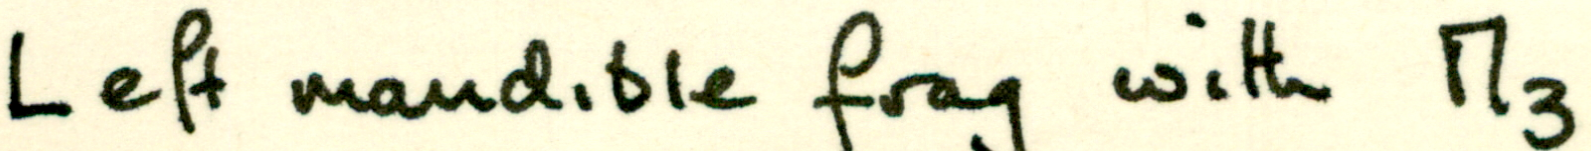

In [10]:
cv2.imwrite('./test.png', crop_img)
Image('./test.png')